In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


In [2]:
#reading and cleaning data from whales return
whale=pd.read_csv('whale_returns.csv' , index_col='Date', infer_datetime_format=True, parse_dates=True)
whale.head()
whale.isnull().count()
whale_df=whale.dropna()

In [3]:

whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
algo=pd.read_csv('algo_returns.csv', index_col='Date',infer_datetime_format=True, parse_dates=True)
algo.head()
algo.isnull().count()
algo_df=algo.dropna()

In [5]:
algo_df
algo_df.dtypes

Algo 1    float64
Algo 2    float64
dtype: object

In [6]:
sp=pd.read_csv('sp500_history.csv', index_col='Date', infer_datetime_format=True, parse_dates=True)

In [7]:
sp.dtypes

Close    object
dtype: object

In [8]:
#sp['Close']=sp['Close'].str.replace('$','')

In [9]:
sp

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [10]:
sp["Close"]=sp["Close"].str.replace("$","")

In [11]:
sp

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06
...,...
2012-10-05,1460.93
2012-10-04,1461.40
2012-10-03,1450.99


In [12]:
sp["Close"]=sp["Close"].astype(float)

In [13]:
sp.dtypes

Close    float64
dtype: object

In [14]:
daily_return=sp.pct_change()

In [15]:
daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [16]:
#checkinbg for nulls and dropping those

In [17]:
daily_return.isnull().dropna()

,Close
Date,
2019-04-23,True
2019-04-22,False
2019-04-18,False
2019-04-17,False
2019-04-16,False
...,...
2012-10-05,False
2012-10-04,False
2012-10-03,False


In [18]:
daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [232]:
sp_return=daily_return

In [242]:
sp_return=sp_return.rename(columns={'Close':"SP_REURN"})

<AxesSubplot:xlabel='Date'>

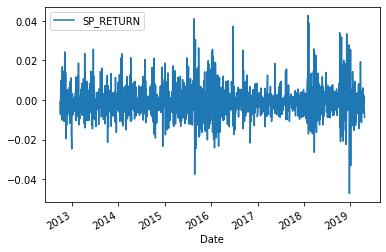

In [243]:
sp_return
sp_return.plot()

In [244]:
#combine dataframes

In [245]:
combine_df=pd.concat([whale_df,algo_df,sp_return], axis='columns',join='outer')

In [246]:
combine_df.sort_index(inplace=True)

In [247]:
combine_df=pd.DataFrame(combine_df)


In [248]:
combine_df=combine_df.dropna()

<AxesSubplot:xlabel='Date'>

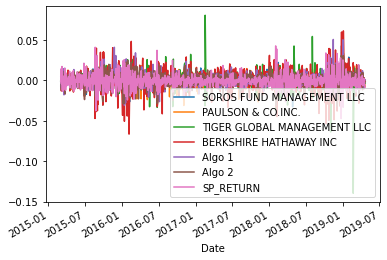

In [249]:
combine_df.plot()

In [250]:
combine_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_RETURN
Date,,,,,,,
2015-03-03,False,False,False,False,False,False,False
2015-03-04,False,False,False,False,False,False,False
2015-03-05,False,False,False,False,False,False,False
2015-03-06,False,False,False,False,False,False,False
2015-03-09,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
2019-04-15,False,False,False,False,False,False,False
2019-04-16,False,False,False,False,False,False,False
2019-04-17,False,False,False,False,False,False,False


In [251]:
#conducting Quantitative analysis

In [320]:
#cummulative returns for combined dataframe
combine_df['SP_RETURN'].cumsum()

Date
2015-03-03    0.004408
2015-03-04    0.003213
2015-03-05    0.017591
2015-03-06    0.013662
2015-03-09    0.030916
                ...   
2019-04-15   -0.283222
2019-04-16   -0.280943
2019-04-17   -0.282520
2019-04-18   -0.283531
2019-04-22   -0.292295
Name: SP_RETURN, Length: 1042, dtype: float64

In [253]:
#daily return
all_daily_return=combine_df.pct_change()
all_daily_return.iloc[:,1]

Date
2015-03-03          NaN
2015-03-04    -1.650792
2015-03-05     0.257544
2015-03-06    -1.876837
2015-03-09    -2.182252
                ...    
2019-04-15    -0.007347
2019-04-16    -1.335693
2019-04-17   -17.661104
2019-04-18    -1.188925
2019-04-22    -7.001458
Name: PAULSON & CO.INC. , Length: 1042, dtype: float64

In [254]:
all_daily_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_RETURN
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-1.271027
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-13.035127
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-1.273267
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-5.391499


<AxesSubplot:xlabel='Date'>

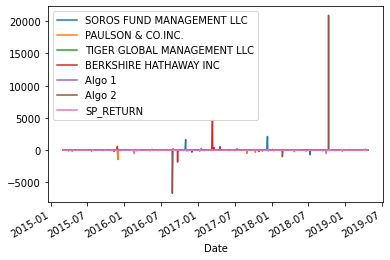

In [255]:
all_daily_return.plot()

In [256]:
#calculating cumulative returns
#all_daily_return_df=pd.DataFrame(all_daily_return())

In [257]:
cumul_returns=(1+all_daily_return).cumprod()-1

In [258]:
cumul_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_RETURN
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-1.271027
2015-03-05,-4.173432,-1.818399,-5.751772,-2.024002,-0.508246,-5.553173,2.261847
2015-03-06,5.246788,-0.282397,16.115278,0.994020,1.552226,11.070068,-1.891356
2015-03-09,-1.460116,-1.848387,-12.790828,-0.748434,1.804686,-2.372559,2.914389


<AxesSubplot:title={'center':'Cumulative Returns over the Years'}, xlabel='Date'>

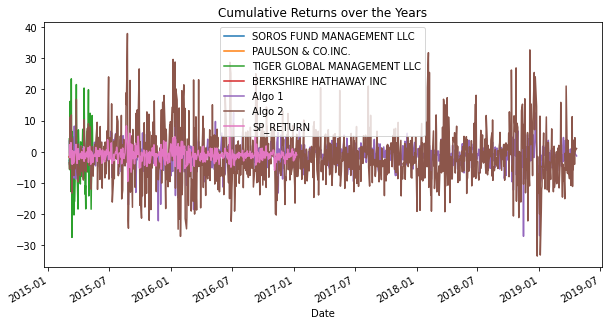

In [259]:
cumul_returns.plot(figsize=(10,5), title="Cumulative Returns over the Years") 

#birkshire hathaway and tiger global management are more riskky while paulson is risk free

<AxesSubplot:>

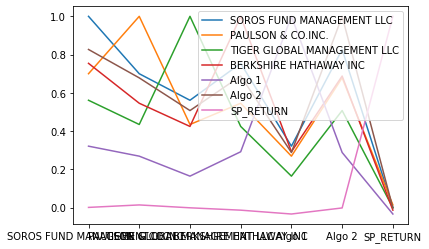

In [261]:

corr_com=combine_df.corr()
corr_com.head()
corr_com.plot()

<AxesSubplot:>

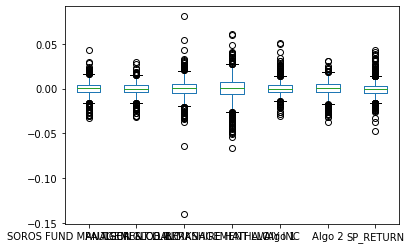

In [262]:


#we have to take our risk analysis by first creating box plot for each portfolio returns 
combine_df.plot.box()

<AxesSubplot:>

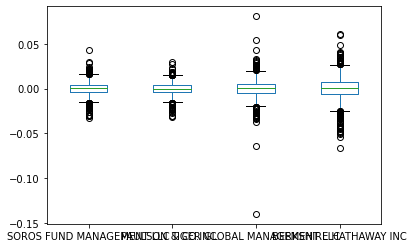

In [273]:
whale_df.plot.box()

<AxesSubplot:>

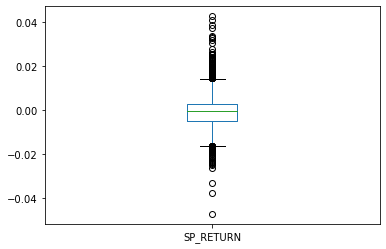

In [272]:
sp_return.plot.box()

In [267]:
#calculating the std of all prtfolios and also finding the risk free
com_std=combine_df.std()
risk_com=com_std.sort_values(ascending=False)
risk_com

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
SP_RETURN                      0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [269]:
combine_df['SP_RETURN'].std()

0.00858688974707399

most risky compares to sp return is  berkshire hathaway

In [270]:
# Calculating the annualized standard deviation for sp,algo and whale(252 trading days)
combine_df_annu = com_std * np.sqrt(252)
combine_df_annu

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
SP_RETURN                      0.136313
dtype: float64

In [55]:
#calculating the rolling stastistics with a 21 day window for all portfoliosand plot

<AxesSubplot:xlabel='Date'>

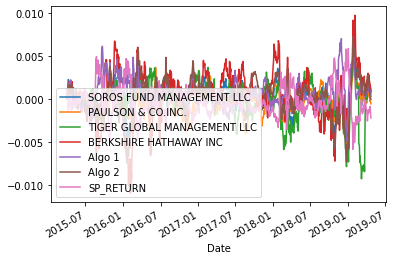

In [276]:
com_rolling=combine_df.rolling(window=21).mean()
com_rolling.plot()

In [282]:
#calculating the correlation
corr_combine=combine_df.corr()

<AxesSubplot:>

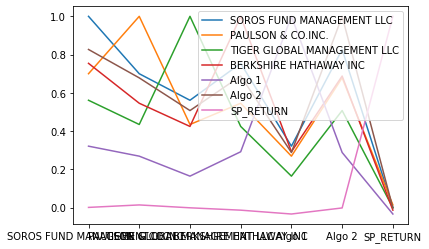

In [283]:
corr_combine.plot()

In [66]:
# Calculating covariance of a single portfolio with sp500

In [284]:
covar=sp_return['SP_RETURN'].cov(algo_df['Algo 1'])

In [285]:
covar

-3.243204804816927e-06

In [286]:
#now lets calculate the varicance between of sp500
algo_var=algo_df['Algo 1'].var()

In [287]:
algo_var

6.380355548579518e-05

In [288]:
algo1_beta=covar/algo_var

In [72]:
algo1_beta

-0.05083109836314645

In [289]:
#calculating the rolling and covarince and also ploting the graph
covar_rolling=sp_return['SP_RETURN'].rolling(window=21).cov(algo_df['Algo 1'])

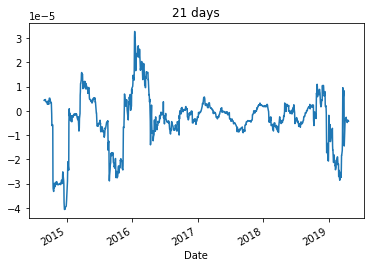

In [292]:
covar_rolling.plot(title='21 days',);

In [78]:

tim=algo_df['Algo 1'].index

ewmm=algo_df['Algo 1'].ewm(halflife='21', times=(tim)).mean()


In [79]:
ewmm

Date
2014-06-05    0.004062
2014-06-06    0.001857
2014-06-09   -0.005012
2014-06-10    0.004406
2014-06-11    0.004760
                ...   
2019-04-25    0.000682
2019-04-26    0.002981
2019-04-29    0.005208
2019-04-30   -0.002944
2019-05-01    0.000094
Name: Algo 1, Length: 1235, dtype: float64

In [80]:
#calculating sharpi ratio, which is comparing the return from the risk free return by the standard deviation

In [321]:
sharp_com=((combine_df.mean()-(combine_df.iloc[:,1]).mean())*250)/(com_std*np.sqrt(250))#using paulson as the risk free rate
sharp_com

SOROS FUND MANAGEMENT LLC      0.777027
PAULSON & CO.INC.              0.000000
TIGER GLOBAL MANAGEMENT LLC    0.185893
BERKSHIRE HATHAWAY INC         0.870514
Algo 1                         1.815266
Algo 2                         0.894670
SP_RETURN                     -0.116053
dtype: float64

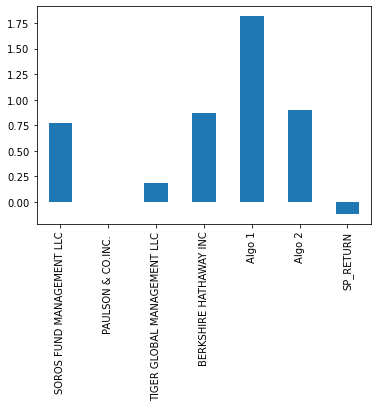

In [322]:
sharp_com.plot.bar();

In [87]:
#Determine whether fthe algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

algo does outperform all them

In [89]:
#creating a custom portfolio

#baxter fb and maple leaf

In [90]:
maple=pd.read_csv('maple leaf_close - Sheet1.csv', infer_datetime_format=True, parse_dates=True)

In [91]:
maple.isnull().count()

Date     246
Close    246
dtype: int64

In [92]:
maple_df=maple.dropna()

In [93]:
#lets make the date appear by itselft and also set the date as index
maple_df['Date'] = maple_df['Date'].str.split(' ',expand=True)[0]

In [94]:
#setting date as index
maple_df=maple_df.set_index('Date')

In [95]:
maple_df

,Close
Date,
1/22/2020,24.81
1/23/2020,25.76
1/24/2020,25.85
1/27/2020,26.00
1/28/2020,25.79
...,...
1/7/2021,26.90
1/8/2021,27.10
1/11/2021,26.88


In [96]:
maple_Df_returns=maple_df.pct_change()

In [97]:
maple_Df_returns

,Close
Date,
1/22/2020,NaN
1/23/2020,0.038291
1/24/2020,0.003494
1/27/2020,0.005803
1/28/2020,-0.008077
...,...
1/7/2021,-0.007746
1/8/2021,0.007435
1/11/2021,-0.008118


In [98]:
maple_Df_returns.dropna()
#renaming fom'close' to maple
maple_Df_returns=maple_Df_returns.rename(columns={'Close':"Maple_leaf"})

In [99]:
maple_Df_returns.head()

,Maple_leaf
Date,
1/22/2020,NaN
1/23/2020,0.038291
1/24/2020,0.003494
1/27/2020,0.005803
1/28/2020,-0.008077


In [100]:
#fb_close declaration

In [101]:
fb=pd.read_csv('fb_close - Sheet1.csv', infer_datetime_format=True, parse_dates=True)

In [102]:
fb_df=fb.dropna()

In [103]:
#lets make the date appear by itselft and also set the date as index
fb_df['Date'] = fb_df['Date'].str.split(' ',expand=True)[0]

In [104]:
#setting date as index
fb_df=fb_df.set_index('Date')

In [105]:
fb_df.head()

,Close
Date,
1/22/2020,221.32
1/23/2020,219.76
1/24/2020,217.94
1/27/2020,214.87
1/28/2020,217.79


In [106]:
#lets make a returns for our fb close
fb_returns=fb_df.pct_change()

In [107]:
fb_returns

,Close
Date,
1/22/2020,NaN
1/23/2020,-0.007049
1/24/2020,-0.008282
1/27/2020,-0.014086
1/28/2020,0.013590
...,...
1/7/2021,0.020622
1/8/2021,-0.004354
1/11/2021,-0.040102


In [108]:
fb_returns=fb_returns.dropna()
fb_returns=fb_returns.rename(columns={'Close':"FB"})

In [109]:
fb_returns.head(2)

,FB
Date,
1/23/2020,-0.007049
1/24/2020,-0.008282


In [110]:
#baxter close to returns processes

In [111]:
baxter=pd.read_csv('baxter_close - Sheet1.csv', infer_datetime_format=True, parse_dates=True)

In [112]:
baxter.head(2)

,Date,Close
0,1/22/2020 16:00:00,91.16
1,1/23/2020 16:00:00,91.10


In [113]:
baxter_df=baxter.dropna()

In [114]:
#lets make the date appear by itselft and also set the date as index
baxter_df['Date'] =baxter_df['Date'].str.split(' ',expand=True)[0]

In [115]:
baxter_df=baxter_df.set_index('Date')

In [116]:
baxter_df.head(2)

,Close
Date,
1/22/2020,91.16
1/23/2020,91.10


In [117]:
#lets declare our returns for baxter
baxter_returns=baxter_df.pct_change()

In [118]:
baxter_returns.head(5)

,Close
Date,
1/22/2020,NaN
1/23/2020,-0.000658
1/24/2020,-0.003513
1/27/2020,-0.002754
1/28/2020,0.000221


In [119]:
baxter_returns=baxter_returns.dropna()

In [120]:
baxter_returns.head(3)

,Close
Date,
1/23/2020,-0.000658
1/24/2020,-0.003513
1/27/2020,-0.002754


In [121]:
#all set w have triple returns set!

In [122]:
baxter_returns=baxter_returns.rename(columns={'Close':"Baxter"})

In [123]:
baxter_returns

,Baxter
Date,
1/23/2020,-0.000658
1/24/2020,-0.003513
1/27/2020,-0.002754
1/28/2020,0.000221
1/29/2020,-0.000552
...,...
1/7/2021,0.006795
1/8/2021,0.002577
1/11/2021,0.009425


In [124]:
combined_custom_df=pd.concat([fb_returns,baxter_returns,maple_Df_returns], axis='columns',join='inner')

In [125]:
combined_custom_df.sort_index(inplace=True)

In [126]:
combined_custom_df=pd.DataFrame(combined_custom_df)

In [127]:
combined_custom_df=combined_custom_df.dropna()

In [128]:
combined_custom_df.head(5)

,FB,Baxter,Maple_leaf
Date,,,
1/11/2021,-0.040102,0.009425,-0.008118
1/12/2021,-0.022387,-0.023160,-0.012277
1/13/2021,0.002190,0.022840,-0.005650
1/23/2020,-0.007049,-0.000658,0.038291
1/24/2020,-0.008282,-0.003513,0.003494


In [323]:
#calculating daily return for all the portfolios
# before combining the df's we already calculated the returns

In [325]:
#dropping some na's
Custom_return=combined_custom_df.dropna()

In [326]:
Custom_return.head(5)

,FB,Baxter,Maple_leaf
Date,,,
1/11/2021,-0.040102,0.009425,-0.008118
1/12/2021,-0.022387,-0.023160,-0.012277
1/13/2021,0.002190,0.022840,-0.005650
1/23/2020,-0.007049,-0.000658,0.038291
1/24/2020,-0.008282,-0.003513,0.003494


In [327]:
# Set weights
weights = [1/3, 1/3, 1/3]


In [328]:
#calculating weighted returns
custom_weighted_returns=Custom_return.dot(weights)

In [329]:
custom_weighted_returns.head()

Date
1/11/2021   -0.012932
1/12/2021   -0.019275
1/13/2021    0.006460
1/23/2020    0.010195
1/24/2020   -0.002767
dtype: float64

In [330]:
comb_cust_weight=pd.concat([Custom_return,custom_weighted_returns], axis='columns',join='inner')

In [331]:
comb_cust_weight.sort_index(inplace=True)

In [332]:
comb_cust_weight=pd.DataFrame(comb_cust_weight)

In [333]:
comb_cust_weight=comb_cust_weight.rename(columns={0:"My_return"})

In [334]:
comb_cust_weight.isnull().count()

FB            242
Baxter        242
Maple_leaf    242
My_return     242
dtype: int64

In [335]:
comb_cust_weight=comb_cust_weight.replace([np.inf, -np.inf], np.nan)
comb_cust_weight.head(10)

,FB,Baxter,Maple_leaf,My_return
Date,,,,
1/11/2021,-0.040102,0.009425,-0.008118,-0.012932
1/12/2021,-0.022387,-0.023160,-0.012277,-0.019275
1/13/2021,0.002190,0.022840,-0.005650,0.006460
1/23/2020,-0.007049,-0.000658,0.038291,0.010195
1/24/2020,-0.008282,-0.003513,0.003494,-0.002767
1/27/2020,-0.014086,-0.002754,0.005803,-0.003679
1/28/2020,0.013590,0.000221,-0.008077,0.001911
1/29/2020,0.024978,-0.000552,0.005816,0.010081
1/30/2020,-0.061372,0.001547,-0.000771,-0.020199


In [336]:
comb_cust_weight=comb_cust_weight.dropna()
comb_cust_weight.head(10)

,FB,Baxter,Maple_leaf,My_return
Date,,,,
1/11/2021,-0.040102,0.009425,-0.008118,-0.012932
1/12/2021,-0.022387,-0.023160,-0.012277,-0.019275
1/13/2021,0.002190,0.022840,-0.005650,0.006460
1/23/2020,-0.007049,-0.000658,0.038291,0.010195
1/24/2020,-0.008282,-0.003513,0.003494,-0.002767
1/27/2020,-0.014086,-0.002754,0.005803,-0.003679
1/28/2020,0.013590,0.000221,-0.008077,0.001911
1/29/2020,0.024978,-0.000552,0.005816,0.010081
1/30/2020,-0.061372,0.001547,-0.000771,-0.020199


In [337]:
#calculating for risk analysis
#calctulatin the annualised std
com_std=comb_cust_weight.std()

In [338]:
com_annualized_std =com_std * np.sqrt(252)

In [339]:
com_annualized_std.head()


FB            0.466018
Baxter        0.374350
Maple_leaf    0.351951
My_return     0.308553
dtype: float64

In [349]:
#calculating and ploting rolling std with 21 day window
cust_roll=(comb_cust_weight.rolling(window=21).mean()).dropna()
cust_roll

,FB,Baxter,Maple_leaf,My_return
Date,,,,
10/19/2020,-0.009701,0.000799,-0.001854,-0.003585
10/2/2020,-0.008986,-0.000182,-0.001855,-0.003674
10/20/2020,-0.006798,0.000892,-0.001539,-0.002482
10/21/2020,-0.004914,0.000156,-0.001443,-0.002067
10/22/2020,-0.004683,0.000019,-0.003093,-0.002585
...,...,...,...,...
9/3/2020,0.000842,-0.005524,-0.002806,-0.002496
9/30/2020,0.001265,-0.003532,-0.004063,-0.002110
9/4/2020,0.000028,-0.003836,-0.004404,-0.002737


<AxesSubplot:xlabel='Date'>

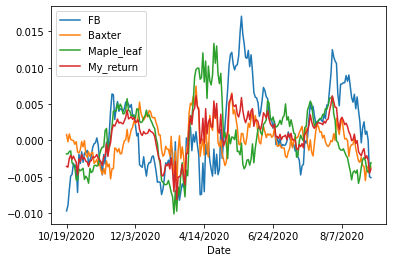

In [350]:

cust_roll.dropna().plot()

In [346]:
#calculating and plotting the correlation
cust_corr=comb_cust_weight.corr()

<AxesSubplot:>

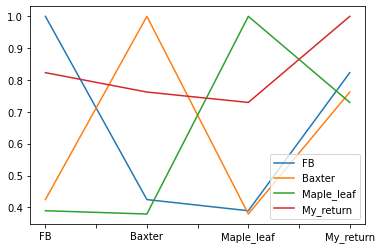

In [347]:
cust_corr.plot()

In [354]:
#calculating the rolling and covarince and also ploting the graph
cust_covar_rolling=Custom_return['FB'].rolling(window=60).cov(Custom_return['Baxter'])
cust_var_roling=Custom_return['Baxter'].rolling(window=60).var()

In [355]:
cust_covar_rolling.dropna()

Date
12/14/2020    0.000011
12/15/2020    0.000019
12/16/2020    0.000011
12/17/2020    0.000009
12/18/2020    0.000009
                ...   
9/3/2020     -0.000005
9/30/2020    -0.000006
9/4/2020      0.000010
9/8/2020      0.000018
9/9/2020      0.000011
Length: 183, dtype: float64

In [181]:
#none of my data comes far as 2019, i might have to use both my portfolios for this, baxter and fb, every thing says null
#cust_var_FB=cust_covar_rolling/sp_return
cust_var_FB=cust_covar_rolling/cust_var_roling

In [186]:
cust_var_FB=cust_var_FB.dropna()
cust_var_FB

Date
12/16/2020    0.399987
12/17/2020    0.357110
12/18/2020    0.355952
12/2/2020     0.346617
12/21/2020    0.346890
                ...   
8/14/2020     0.073244
8/17/2020     0.075627
8/18/2020     0.057248
8/19/2020     0.056821
8/20/2020     0.063003
Length: 149, dtype: float64

<AxesSubplot:xlabel='Date'>

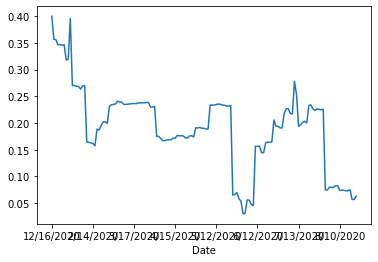

In [185]:
cust_var_FB.plot()

In [195]:
#sharpi ratios for baxter
sharp_baxter=(com['Baxter']-com_annualized_std['Baxter'])/com_std['Baxter']

In [198]:
sharp_baxter.dropna()

Date
1/11/2021   -15.480281
1/12/2021   -16.843264
1/13/2021   -14.919129
1/23/2020   -15.902039
1/24/2020   -16.021437
               ...    
9/3/2020    -17.062526
9/30/2020   -15.171100
9/4/2020    -16.460825
9/8/2020    -16.387840
9/9/2020    -15.066641
Name: Baxter, Length: 242, dtype: float64

<AxesSubplot:xlabel='Date'>

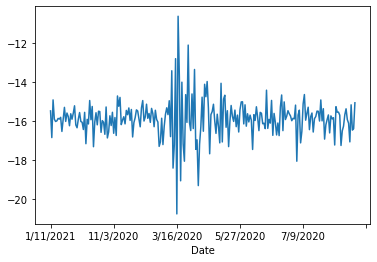

In [199]:
sharp_baxter.plot()

In [359]:
#sharpi ratios for maple
sharp_com_cust=((comb_cust_weight.mean()-(comb_cust_weight.iloc[:,3]).mean())*250)/(com_std*np.sqrt(250))#using paulson as the risk free rate
sharp_com_cust

FB            0.094065
Baxter       -0.222498
Maple_leaf    0.112107
My_return     0.000000
dtype: float64

<AxesSubplot:>

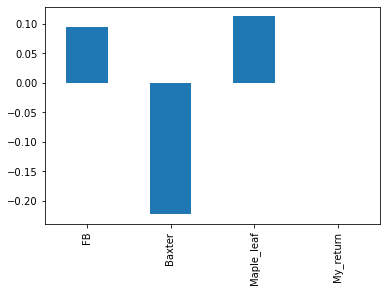

In [360]:
sharp_com_cust.plot.bar()